# Week 07 - Regression

## Types of Regression

* Simple Linear Regression
* Multiple Linear Regression
* Polynomial Regression
* Support Vector Regression
* Decision Tree Regression
* Random Forest Regression

See Week 07 - More Regression notebook

## The Dependent Variable

* Linear Regression: y is continuous, numerical
* Linear regression is a linear approach for modelling the relationship between a scalar response and one or more explanatory variables (also known as dependent and independent variables). https://en.wikipedia.org/wiki/Linear_regression
* Scalar, a physical quantity that is completely described by its magnitude; examples of scalars are volume, density, speed, energy, mass, and time. Other quantities, such as force and velocity, have both magnitude and direction and are called vectors. https://www.britannica.com/science/scalar

# Simple Linear Regression

In statistics, linear regression is a linear approach for modelling the relationship between a scalar response and one or more explanatory variable (also known as dependent and independent variables). The case of one explanatory variable is called simple linear regression; for more than one, the process is called multiple linear regression. This term is distinct from multivariate linear regression, where multiple correlated dependent variables are predicted, rather than a single scalar variable.

https://en.wikipedia.org/wiki/Linear_regression

## $y = mx + b$

* $m = \frac{N * \sum{(xy)} - \sum{x}\sum{y}}{N * \sum{x^2} - (\sum{x})^2}$
* $b = \frac{\sum{y} - m * \sum{x}}{N}$

In [1]:
# https://www.mathsisfun.com/data/least-squares-regression.html
import numpy as np
import pandas as pd

x = np.array([1, 2, 3, 4, 5])
y = np.array([1, 3, 2, 3, 5])

def xy(r):
    return r.x * r.y

m_table = pd.DataFrame({'x': x, 'y': y})
m_table['x^2'] = m_table['x'].apply(lambda x: x**2)
m_table['xy'] = m_table.apply(xy, axis=1)
print(m_table.head())

N = len(x)
sums = list(m_table.sum())
print(sums)
m = (N * sums[3] - sums[0] * sums[1]) / (N * sums[2] - sums[0]**2)
print('m:', m)
b = (sums[1]-m*sums[0])/N
print('b:', b)

   x  y  x^2  xy
0  1  1    1   1
1  2  3    4   6
2  3  2    9   6
3  4  3   16  12
4  5  5   25  25
[15, 14, 55, 50]
m: 0.8
b: 0.4


### $y = \alpha + \beta x$

### $y_i = \alpha + \beta x_i + \epsilon_i$

The parameters for linear regression are $\alpha$ and $\beta$ and $e$. The error term, $e$, represents the rest of $y$ that $X$ cannot explain. If we look at $y = f(X) + e$ and assume that the function of $e$ is iid, then the sum of $e$ will be zero and is usually left off of the equation. 

The sum of the residuals always equals zero (assuming that your line is actually the line of 'best fit...' The mean of residuals is also equal to zero, as the mean = the sum of the residuals / the number of items. The sum is zero, so 0/n will always equal zero.

Stephanie Glen. "Residual Values (Residuals) in Regression Analysis" From StatisticsHowTo.com: Elementary Statistics for the rest of us! https://www.statisticshowto.com/residual/

* $\hat{\alpha} = \bar{y} - (\hat{\beta}\bar{x})$
* $\hat{\beta} = \frac{\sum^N_{i=1}(x_i - \bar{x})(y_i - \bar{y})}{\sum^N_{i=1}(x_i - \bar{x})^2}$

where

* $\bar{x}$ and $\bar{y}$ as the average of $x_i$ and $y_i$, respectively
* $r_{xy}$ is the **sample correlation coefficient** between x and y
* $s_x$ and $s_y$ is the **uncorrected sample standard deviations** of x and y
* $s_{x}^2$ and $s_{x,y}$ is the **sample variance** and **sample covariance**, respectively

**Sample Correlation Coefficient**: In statistics, correlation or dependence is any statistical relationship, whether causal or not, between two random variables or bivariate data. Although in the broadest sense, "correlation" may indicate any type of association, in statistics it normally refers to the degree to which a pair of variables are linearly related. The sample correlation coefficient can be used to estimate the population Pearson correlation

https://en.wikipedia.org/wiki/Correlation#Sample_correlation_coefficient

**Uncorrected Sample Standard Deviation**: In statistics, the standard deviation is a measure of the amount of variation or dispersion of a set of values. A low standard deviation indicates that the values tend to be close to the mean (also called the expected value) of the set, while a high standard deviation indicates that the values are spread out over a wider range. The formula for the population standard deviation (of a finite population) can be applied to the sample, using the size of the sample as the size of the population (though the actual population size from which the sample is drawn may be much larger). This estimator, denoted by sN, is known as the uncorrected sample standard deviation, or sometimes the standard deviation of the sample (considered as the entire population), and is defined as.

https://en.wikipedia.org/wiki/Standard_deviation#Uncorrected_sample_standard_deviation

### Residuals

https://www.statology.org/residual-sum-of-squares-in-excel/

### Bias

According to Wikipedia (2022):

In statistics, Bessel's correction is the use of n − 1 instead of n in the formula for the sample variance and sample standard deviation, where n is the number of observations in a sample. This method corrects the bias in the estimation of the population variance. It also partially corrects the bias in the estimation of the population standard deviation. However, the correction often increases the mean squared error in these estimations. This technique is named after Friedrich Bessel (para 1).

Bessel's correction. (June 13, 2022). In *Wikipedia*. https://en.wikipedia.org/wiki/Bessel%27s_correction

* What is bias? https://stats.libretexts.org/Bookshelves/Applied_Statistics/Book%3A_Answering_Questions_with_Data_-__Introductory_Statistics_for_Psychology_Students_(Crump)/04%3A_Probability_Sampling_and_Estimation/4.13%3A_Estimating_population_parameters 
* What are degrees of freedom? https://www.statisticshowto.com/probability-and-statistics/hypothesis-testing/degrees-of-freedom/

### Biased

**Standard Deviation of the Population**: $\sigma = \sqrt{\frac{1}{N}\sum(x-\bar{x})^2}$

**Uncorrected Sample Standard Deviation**: $sN = \sqrt{\frac{1}{N}\sum(x-\bar{x})^2}$

### Unbiased

**Standard Deviation of the Sample**: $s = \sqrt{\frac{1}{n-1}\sum(x-\bar{x})^2}$

The following plots the line of best fit. We'll break it down using the formulas for $\widehat{\alpha }$ and $\widehat{\beta}$. The points are plotted along with the line of best fit. The red lines indicate how much error there is with the actual values (the green points) and the predicted values (the black points) that forms the line of best fit.

a= 0.4 b= 0.8
x values: [1 2 3 4 5]
y values: [1 3 2 3 5]
predicted values: [1.2, 2.0, 2.8, 3.6, 4.4]


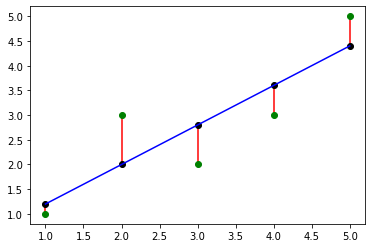

In [2]:
# plot x, y coordinates
import matplotlib.pyplot as plt
import numpy as np

x = np.array([1, 2, 3, 4, 5])
y = np.array([1, 3, 2, 3, 5])

# create basic scatterplot
plt.plot(x, y, 'go',)

# obtain a and b of linear regression line
b, a = np.polyfit(x, y, 1)
print('a=', a.round(1), 'b=', b.round(1))

# predicted values
y_hat = [round(a + (b*x), 2) for x in x]
print(f'x values: {x}')
print(f'y values: {y}')
print(f'predicted values: {y_hat}')
plt.plot(x, y_hat, 'ko')

# add linear regression line to scatterplot 
plt.plot(x, a+b*x, 'b')

# ax.vlines(x,y,y)
plt.vlines(x, y, a+b*x, 'r')

plt.show()

Let's do some math and solve for $\beta$ using the formula

$\widehat{\beta} = \frac{s_{x,y}}{s^2_x} = r_{xy}\frac{s_y}{s_x} = \frac{\sum{(x - \bar{x})(y - \bar{y})}}{\sum(x - \bar{x})^2}$

where: 
* $\bar{x}$ and $\bar{y}$ are the averages of x and y
* $r_{xy}$ is the sample variance
* $s_x$ and $s_y$ are the sample standard deviation (uncorrected)
* $s_{x,y}$ and $s^2_x$ are the sample variance and sample covariance

In [3]:
# our data
X = [1, 2, 3, 4, 5]

# find the mean of X
# x_mean = (1 + 2 + 3 + 4 + 5) / 5 or using list comprehension
x_mean = sum(i for i in x) / len(x)

#print x_mean
x_mean

3.0

In [4]:
# print the mean of y
y = [1, 3, 2, 3, 5]
y_mean = sum(i for i in y) / len(y)
y_mean

2.8

Recall the $\beta$ formula according to Wikipedia

$\widehat{\beta} = \frac{\sum{(x - \bar{x})(y - \bar{y})}}{\sum(x - \bar{x})^2}$

So, solving for the numerator of $\widehat{\beta}$ we would use: $\sum(x-\bar{x})(y-\bar{y})$

Since the dataset is small we can do something like this: <br />
((1 - 3) * (1 - 2.8)) +<br />
((2 - 3) * (3 - 2.8)) +<br />
((3 - 3) * (2 - 2.8)) +<br />
((4 - 3) * (3 - 2.8)) +<br />
((5 - 3) * (5 - 2.8)) = 8

In [5]:
# print the numerator the pythonic way
numerator = sum([(i - x_mean) * (j - y_mean) for i, j in zip(x, y)])
numerator

8.0

Recall the $\beta$ formula according to Wikipedia

$\widehat{\beta} = \frac{\sum{(x - \bar{x})(y - \bar{y})}}{\sum(x - \bar{x})^2}$

So, solving for the denominator of $\widehat{\beta}$ we would use: $\sum(x - \bar{x})^2$

In [6]:
# get the denominator
denominator = sum((i - x_mean)**2 for i in x)
denominator

10.0

So, $\beta$, or specifically $\widehat{\beta}$, is equal to the numerator divided by the denominator

In [7]:
beta = numerator / denominator
beta

0.8

To find $\alpha$ we use the formula $\widehat{\alpha} = \bar{y} - \beta \bar{x}$

In [8]:
# calculate alpha
alpha = round(y_mean - (beta * x_mean), 2)
alpha

0.4

$y = a + \beta X$

Our linear regression equation is solved: <br />
y = 0.4 + 0.8(X)

## Least Squares

The method of least squares is a standard approach in regression analysis to approximate the solution of overdetermined systems (sets of equations in which there are more equations than unknowns) by minimizing the sum of the squares of the residuals (a residual being: the difference between an observed value, and the fitted value provided by a model) made in the results of each individual equation.

https://en.wikipedia.org/wiki/Least_squares 

### The Constant

In linear regression you need that constants to have lines which are not constrained to pass through origin. Think of linear model y=b1x1+b2x2+.... If all xi are 0, y must be 0, you need an additional parameter to pass that constraint

https://datascience.stackexchange.com/questions/55598/why-we-add-a-constant-value-column-in-our-dataframe-sometimes

... our regression slopes would be less useful (without the constant).

1. Imagine the equation for a line: y=mx + b -> take the constant out and you have y=mx which means that the slope will have to account for a larger explanation than with the constant.
2. think of the constant as the “baseline” of the data and the explanatory values (the beta slopes) as the things that can affect this mean. For example, ...suppose a particular leaf will average 2 inches long (constant), but with different weather conditions, the leaf will either grow (+ length) or grow (- length). Without the constant, all the data will point to the weather conditions having a tremendous weight on the regressions - mathematically showing y = weather conditions times slope.

In a nut shell, it’s there to assist in providing an accurate view of the slope values.

https://www.quora.com/In-regression-why-do-we-include-a-constant-term (Hamilton Goff)

The constant term prevents this overall bias by forcing the residual mean to equal zero. Imagine that you can move the regression line up or down to the point where the residual mean equals zero. For example, if the regression produces residuals with a positive average, just move the line up until the mean equals zero.

https://statisticsbyjim.com/regression/interpret-constant-y-intercept-regression/

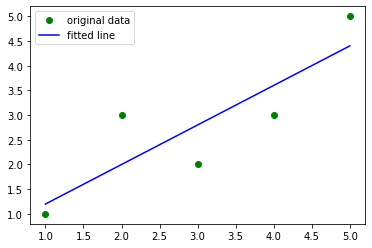

y = 0.4 + 0.8(X)


In [9]:
# using scipy
import scipy.stats as stats

x = np.array([1, 2, 3, 4, 5])
y = np.array([1, 3, 2, 3, 5])

model = stats.linregress(x, y)

plt.plot(x, y, 'go', label='original data')
plt.plot(x, model.intercept + model.slope*x, 'b', label='fitted line')
plt.legend()
plt.show()

print(f'y = {model.intercept:.2} + {model.slope:.2}(X)')

In [10]:
# use numpy linear algebra least squares
import numpy as np

x = np.array([1, 2, 3, 4, 5])
y = np.array([1, 3, 2, 3, 5])

x = np.vstack([np.ones(len(x)), x]).T
a, b = np.linalg.lstsq(x, y, rcond=None)[0]
print(f'y = {a:0.1f} + {b:0.1f}X')

y = 0.4 + 0.8X


## Linear Regression with Scikit-learn

Scikit-learn (formerly scikits.learn and also known as sklearn) is a free software machine learning library for the Python programming language. It features various classification, regression and clustering algorithms including support vector machines, random forests, gradient boosting, k-means and DBSCAN, and is designed to interoperate with the Python numerical and scientific libraries NumPy and SciPy.

https://en.wikipedia.org/wiki/Scikit-learn

As mentioned, Scikit-learn provides us with a linear regression model that we can use as demonstrated in the next cell.

In [11]:
# using sklearn
from sklearn.linear_model import LinearRegression

x = np.array([1, 2, 3, 4, 5])
y = np.array([1, 3, 2, 3, 5])
x = x.reshape(-1, 1)

model = LinearRegression()
model.fit(x, y)
print(f'y = {model.intercept_:.2} + {model.coef_[0]:.2}(X)')

y = 0.4 + 0.8(X)


### Matrix Multiplication (x = x.reshape(-1, 1))

In mathematics, particularly in linear algebra, matrix multiplication is a binary operation that produces a matrix from two matrices. For matrix multiplication, the number of columns in the first matrix must be equal to the number of rows in the second matrix. The resulting matrix, known as the matrix product, has the number of rows of the first and the number of columns of the second matrix. The product of matrices A and B is denoted as AB.

https://en.wikipedia.org/wiki/Matrix_multiplication

In [12]:
# Let's look at the x data
x = np.array([1, 2, 3, 4, 5])
x

array([1, 2, 3, 4, 5])

In [13]:
# Look at the y data
y = np.array([1, 3, 2, 3, 5])
y

array([1, 3, 2, 3, 5])

To be able to multiply two matrices, the number of columns in the first matrix must equal the number of rows in the second matrix (array).

In [14]:
# Reshape x so that the columns in x equals the number of rows in y
x = x.reshape(-1, 1)
x

array([[1],
       [2],
       [3],
       [4],
       [5]])

### Linear Algebra
* $y_i = \theta^TX_i + \epsilon_i$
* $h_\theta(x) = \theta_0 + \theta_1x_1$

https://towardsdatascience.com/performing-linear-regression-using-the-normal-equation-6372ed3c57

In [15]:
x = np.append(arr = np.ones((5, 1)).astype(int), values = x, axis = 1)
print('weights = ', np.linalg.inv(x.T.dot(x)).dot(x.T).dot(y))

weights =  [0.4 0.8]


### Why Matrix Multiplication?

Linear algebra is often used in data science / machine learning which includes matrix multiplication. To stay within the scope of this course we will simply say that because of the large number of features that X can potentially represent, it is more efficient to use matrix multiplication.

Because matrix multiplication is such a central operation in many numerical algorithms, much work has been invested in making matrix multiplication algorithms efficient. Applications of matrix multiplication in computational problems are found in many fields including scientific computing and pattern recognition and in seemingly unrelated problems such as counting the paths through a graph.

https://en.wikipedia.org/wiki/Matrix_multiplication_algorithm

Please review the following links to learn more:

* https://en.wikipedia.org/wiki/Linear_algebra
* https://online.stat.psu.edu/stat462/node/132/
* https://www.mathsisfun.com/algebra/matrix-multiplying.html

# Multiple Linear Regression

https://www.investopedia.com/terms/m/mlr.asp 

$y = \beta_0 + \beta_1 x_1 + \beta_2 x_2 ... + \beta_n x_n + \epsilon$

where:
* y = dependent variable
* x = explanatory  variable
* $\beta_0$ = intercept
* $\beta_n$ = slope coefficients
* $\epsilon$ = the model's error term

### Assumptions of Linear Regression

* Linearity: There is a linear relationship between the independent variable and the dependent variable
* No Multicollinearity: Features should not be highly correlated
* Normality: The residuals are normally distributed
* Homoscedasticity: The residuals have an even distribution around the mean and across the spread
* Independence: There is no correlation between residuals; there is no trend, no pattern, no structure in residuals
* Time series may violate independence 
* Elements that are randomly assigned to features may violate independence
* All relevant explanatory variables must be used
* Features cannot be correlated with error term

Become familiar with the plots provided in the following links: 
* https://www.analyticsvidhya.com/blog/2016/07/deeper-regression-analysis-assumptions-plots-solutions/
* https://www.jmp.com/en_us/statistics-knowledge-portal/what-is-regression/simple-linear-regression-assumptions.html

## Feature Scaling Digression

### Standardization

https://www.statisticshowto.com/standardized-values-examples/

#### $\frac{X - \mu}{\sigma}$

* -3 to 3

Example:
<pre>
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train['Feature Name'] = scaler.fit_transform(X_train[['Feature Name']])
</pre>

### Normalization

* Min Max Scaling
* Mean Normalization
* Max Absolute Scaling
* Robust Scaling


#### Min Max Example: $\frac{X - X_{min}}{X_{max} - X_{min}}$

#### Mean Normalization Example: $\frac{X - \mu}{X_{max} - X_{min}}$

* 0 to 1

Example
<pre>
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
X_train['Feature Name'] = scaler.fit_transform(X_train[['Feature Name']])
</pre>

## Data Preparation

In [16]:
# get data
import pandas as pd

df = pd.read_csv('mariokart.csv', index_col=0)
print(df.shape)
print(df.head())

(108, 19)
   Baby Daisy   Luigi      Toad     Yoshi    Bowser  Donkey Kong  \
0      2.4110  2.4110 -0.626361  0.074411  1.211789    -1.211789   
1      1.0429  1.0429  0.717901  1.126810  2.053112    -2.053112   
2      0.5595  0.5595 -0.168204  1.814973  1.343802    -1.343802   
3      0.1680  0.1680       NaN -0.052597  0.927656    -0.927656   
4     -1.8362 -1.8362  0.229791  0.402646  0.309740    -0.309740   

   Princess Peach  Isabelle  Koopa Troopa     Mario  Birdo  Baby Mario  \
0        1.181437  1.244480      0.910653 -0.060940   0.07        0.03   
1        0.634625  1.653490      0.715433  2.215726   0.07        0.03   
2        0.371198 -0.623509      0.395969 -0.950355   0.07        0.03   
3        1.324177 -0.137387     -0.271712  0.747625   0.07        0.03   
4             NaN       NaN      0.582512 -0.547232   0.07        0.03   

      Wario  Mario Kart      Cat Peach King Boo Inkling  Chain Chomp  \
0  'medium'   92.540574  kind of agree      yes    down     5.23

In [17]:
# get info
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 108 entries, 0 to 107
Data columns (total 19 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Baby Daisy      108 non-null    float64
 1   Luigi           108 non-null    float64
 2   Toad            96 non-null     float64
 3   Yoshi           108 non-null    float64
 4   Bowser          100 non-null    float64
 5   Donkey Kong     100 non-null    float64
 6   Princess Peach  99 non-null     float64
 7   Isabelle        93 non-null     float64
 8   Koopa Troopa    105 non-null    float64
 9   Mario           108 non-null    float64
 10  Birdo           107 non-null    float64
 11  Baby Mario      108 non-null    float64
 12  Wario           90 non-null     object 
 13  Mario Kart      108 non-null    float64
 14  Cat Peach       108 non-null    object 
 15  King Boo        108 non-null    object 
 16  Inkling         108 non-null    object 
 17  Chain Chomp     108 non-null    flo

### Constants

In [18]:
# replace missing values and then check how many unique values are in each variable
few_values = [
    val for val in df.columns if len(df[val].fillna(0).unique()) == 1
]

few_values

['Baby Mario']

### Quasi Constants

In [19]:
# quasi constant values (sometimes these may be boolean features)
for val in df.columns.sort_values():
    if (len(df[val].unique()) < 3):
        print(df[val].value_counts())

0.03    108
Name: Baby Mario, dtype: int64
0.07    107
Name: Birdo, dtype: int64
down    59
up      49
Name: Inkling, dtype: int64
yes    62
no     46
Name: King Boo, dtype: int64


### Duplicates

In [20]:
# duplicate rows
df[df.duplicated(keep=False)]

,Baby Daisy,Luigi,Toad,Yoshi,Bowser,Donkey Kong,Princess Peach,Isabelle,Koopa Troopa,Mario,Birdo,Baby Mario,Wario,Mario Kart,Cat Peach,King Boo,Inkling,Chain Chomp,Mii
0,2.4110,2.4110,-0.626361,0.074411,1.211789,-1.211789,1.181437,1.244480,0.910653,-0.060940,0.07,0.03,'medium',92.540574,kind of agree,yes,down,5.233643,10.335821
1,1.0429,1.0429,0.717901,1.126810,2.053112,-2.053112,0.634625,1.653490,0.715433,2.215726,0.07,0.03,'medium',157.505874,kind of agree,yes,up,6.306884,10.648843
2,0.5595,0.5595,-0.168204,1.814973,1.343802,-1.343802,0.371198,-0.623509,0.395969,-0.950355,0.07,0.03,'fast',6.590651,agree,no,down,4.514619,9.595727
3,0.1680,0.1680,NaN,-0.052597,0.927656,-0.927656,1.324177,-0.137387,-0.271712,0.747625,0.07,0.03,'fast',-131.240802,agree,no,down,5.021733,9.980792
4,-1.8362,-1.8362,0.229791,0.402646,0.309740,-0.309740,NaN,NaN,0.582512,-0.547232,0.07,0.03,'slow',99.819530,agree,no,up,3.611539,9.074953
5,0.4679,0.4679,0.581340,-1.451522,0.204382,-0.204382,1.282254,-2.057193,0.371720,-1.331312,0.07,0.03,'fast',-138.509030,neutral,yes,down,8.352267,12.112289
6,-1.1568,-1.1568,-0.102359,0.852872,0.857795,-0.857795,0.331492,1.425452,1.825671,0.219545,0.07,0.03,'medium',141.500670,disagree,no,up,1.984070,8.300301
7,-0.0035,-0.0035,0.446270,-0.924599,0.504912,-0.504912,0.594814,2.375305,1.446061,-2.779021,0.07,0.03,'medium',265.629065,kind of agree,yes,down,3.395887,9.279727
100,2.4110,2.4110,-0.626361,0.074411,1.211789,-1.211789,1.181437,1.244480,0.910653,-0.060940,0.07,0.03,'medium',92.540574,kind of agree,yes,down,5.233643,10.335821
101,1.0429,1.0429,0.717901,1.126810,2.053112,-2.053112,0.634625,1.653490,0.715433,2.215726,0.07,0.03,'medium',157.505874,kind of agree,yes,up,6.306884,10.648843


In [21]:
# drop duplicate rows
df.drop_duplicates(inplace=True)

In [22]:
# check of duplicate columns
duplicate_features = []
for i in range(0, len(df.columns)):
    orig = df.columns[i]

    for dupe in df.columns[i + 1:]:
        if df[orig].equals(df[dupe]):
            duplicate_features.append(dupe)
            print(f'{orig} looks the same as {dupe}')
            
duplicate_features

Baby Daisy looks the same as Luigi


['Luigi']

### Drop Weak Features

In [23]:
# drop the variables that are duplicated or low in variance
df.drop(['Luigi', 'Baby Mario', 'Birdo'], axis=1, inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 100 entries, 0 to 99
Data columns (total 16 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Baby Daisy      100 non-null    float64
 1   Toad            89 non-null     float64
 2   Yoshi           100 non-null    float64
 3   Bowser          92 non-null     float64
 4   Donkey Kong     92 non-null     float64
 5   Princess Peach  92 non-null     float64
 6   Isabelle        86 non-null     float64
 7   Koopa Troopa    97 non-null     float64
 8   Mario           100 non-null    float64
 9   Wario           82 non-null     object 
 10  Mario Kart      100 non-null    float64
 11  Cat Peach       100 non-null    object 
 12  King Boo        100 non-null    object 
 13  Inkling         100 non-null    object 
 14  Chain Chomp     100 non-null    float64
 15  Mii             100 non-null    float64
dtypes: float64(12), object(4)
memory usage: 13.3+ KB


# Drop Features with 0 or near 0 Variance?

Data are not good or bad, but sometimes data can be misrepresented. Change in the units of measurement can change the variance.

More on this after we visit with statsmodel OLS

### Missing Data

In [24]:
# check for nulls
df.isnull().sum()

Baby Daisy         0
Toad              11
Yoshi              0
Bowser             8
Donkey Kong        8
Princess Peach     8
Isabelle          14
Koopa Troopa       3
Mario              0
Wario             18
Mario Kart         0
Cat Peach          0
King Boo           0
Inkling            0
Chain Chomp        0
Mii                0
dtype: int64

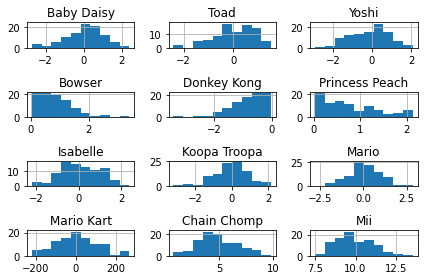

In [25]:
# look at the shape of variables that are numerical
import matplotlib.pyplot as plt

df.hist()
plt.tight_layout();

In [26]:
# impute missing values with mean and median
df['Toad'].fillna(round(df['Toad'].mean(), 2), inplace=True)
df['Koopa Troopa'].fillna(round(df['Koopa Troopa'].mean(), 2), inplace=True)
df['Bowser'].fillna(round(df['Bowser'].mean(), 2), inplace=True)
df['Donkey Kong'].fillna(df['Donkey Kong'].median(), inplace=True)
df['Princess Peach'].fillna(df['Princess Peach'].median(), inplace=True)
df['Isabelle'].fillna(df['Isabelle'].median(), inplace=True)
df.isnull().sum()

Baby Daisy         0
Toad               0
Yoshi              0
Bowser             0
Donkey Kong        0
Princess Peach     0
Isabelle           0
Koopa Troopa       0
Mario              0
Wario             18
Mario Kart         0
Cat Peach          0
King Boo           0
Inkling            0
Chain Chomp        0
Mii                0
dtype: int64

In [27]:
# impute missing values with mode
print(df['Wario'].value_counts(dropna=False))

'medium'    28
'slow'      28
'fast'      26
NaN         18
Name: Wario, dtype: int64


In [28]:
# replace work_status with mode (not employed)
df['Wario'].fillna(df['Wario'].mode()[0], inplace=True)
df.isnull().sum()

Baby Daisy        0
Toad              0
Yoshi             0
Bowser            0
Donkey Kong       0
Princess Peach    0
Isabelle          0
Koopa Troopa      0
Mario             0
Wario             0
Mario Kart        0
Cat Peach         0
King Boo          0
Inkling           0
Chain Chomp       0
Mii               0
dtype: int64

### Train Test Split

In [29]:
# train test split
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(df.drop(['Mario Kart'], axis=1), df['Mario Kart'], test_size=.2, random_state=42)

print(X_train.shape)
print(X_test.shape)

(80, 15)
(20, 15)


# Exploratory Data Analysis

In [30]:
# describe
X_train.describe()

,Baby Daisy,Toad,Yoshi,Bowser,Donkey Kong,Princess Peach,Isabelle,Koopa Troopa,Mario,Chain Chomp,Mii
count,80.000000,80.000000,80.000000,80.000000,80.000000,80.000000,80.000000,80.000000,80.000000,80.000000,80.000000
mean,0.044831,0.133292,-0.026901,0.869974,-0.821410,0.807987,0.096714,0.002092,0.086630,4.944834,10.005149
std,0.928987,0.762363,1.040660,0.586103,0.581410,0.552883,0.877014,0.945108,1.026117,1.862491,1.167776
min,-2.731400,-2.415655,-2.922104,0.037083,-2.605991,0.037457,-2.204556,-3.161117,-2.779021,0.707656,7.856360
25%,-0.453200,-0.243673,-0.914072,0.439368,-1.135822,0.378920,-0.472146,-0.515789,-0.502330,3.505176,9.203502
50%,0.115050,0.040000,0.034652,0.834697,-0.725993,0.637813,0.039016,-0.017943,0.019381,4.872206,9.906376
75%,0.731000,0.719305,0.795356,1.186424,-0.361640,1.201492,0.672628,0.529450,0.712178,6.161283,10.741554
max,2.045500,1.527723,2.084597,2.605991,-0.018041,2.127720,2.375305,2.142494,2.857184,9.839862,13.504985


### Outliers

In [31]:
# quartiles
for feat in X_train._get_numeric_data().columns[1:]:
    q1 = X_train[feat].quantile(0.25)
    q3 = X_train[feat].quantile(0.75)
    iqr = q3 - q1
    lower_fence = (q1 - 1.5 * iqr)
    upper_fence = (q3 + 1.5 * iqr)
    lower_count = X_train[feat][X_train[feat] < lower_fence].count()
    upper_count = X_train[feat][X_train[feat] > upper_fence].count()
    print(f'{feat} outliers = {lower_count + upper_count}: lower_fence: {lower_fence}, upper_fence: {upper_fence}, lower_count: {lower_count}, upper_count: {upper_count}')

Toad outliers = 1: lower_fence: -1.688140424477285, upper_fence: 2.1637717533054572, lower_count: 1, upper_count: 0
Yoshi outliers = 0: lower_fence: -3.478214496448368, upper_fence: 3.359499053123616, lower_count: 0, upper_count: 0
Bowser outliers = 2: lower_fence: -0.6812148746150328, upper_fence: 2.307007345267791, lower_count: 0, upper_count: 2
Donkey Kong outliers = 1: lower_fence: -2.297094617960421, upper_fence: 0.7996332990883955, lower_count: 1, upper_count: 0
Princess Peach outliers = 0: lower_fence: -0.8549392182566208, upper_fence: 2.435351237839974, lower_count: 0, upper_count: 0
Isabelle outliers = 1: lower_fence: -2.1893068218341605, upper_fence: 2.3897892272850956, lower_count: 1, upper_count: 0
Koopa Troopa outliers = 3: lower_fence: -2.0836459519398085, upper_fence: 2.0973071731135304, lower_count: 2, upper_count: 1
Mario outliers = 3: lower_fence: -2.324092910323217, upper_fence: 2.533940943914705, lower_count: 1, upper_count: 2
Chain Chomp outliers = 0: lower_fence: 

<AxesSubplot:>

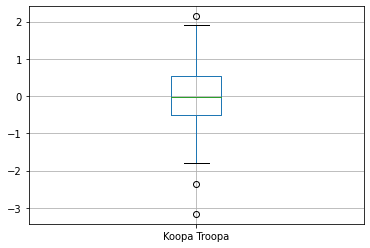

In [32]:
# Assignment boxplot
X_train.boxplot(column=['Koopa Troopa']);

<AxesSubplot:xlabel='Bowser'>

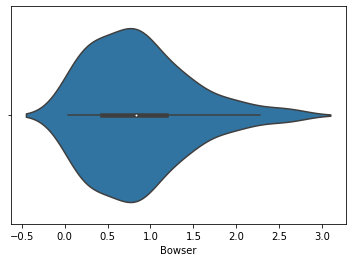

In [33]:
# Assignment violinplot
import seaborn as sns

sns.violinplot(x=X_train['Bowser']);

# Correlation

* Correlation heat map
* Correlation with code
* Variance Threshold
* Variance Inflation Factor
* Removing Multicollinearity and Re Imaging
* Re-enginnering Multicollinearity Features

See Week 07 - Correlation notebook

### Multicollinearity

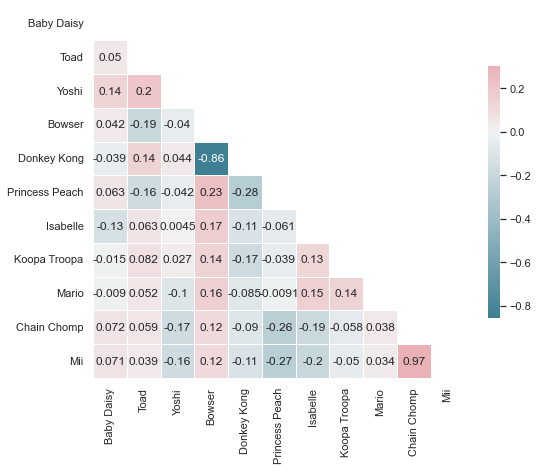

In [34]:
# correlation heat map
import numpy as np
import seaborn as sns
from scipy import stats

# correlation matrix
sns.set(style="white")

# compute the correlation matrix
corr = X_train.corr()

# generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=bool)
mask[np.triu_indices_from(mask)] = True

# set up the matplotlib figure
# f, ax = plt.subplots()
f = plt.figure(figsize=(8, 8))

# generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5}, annot=True);

plt.tight_layout()

In [35]:
# delete one of the features out of the pair(s) that show multicollinearity
# whatever you do for X_train, do for X_test
X_train.drop(['Mii', 'Donkey Kong'], axis=1, inplace=True)
X_test.drop(['Mii', 'Donkey Kong'], axis=1, inplace=True)

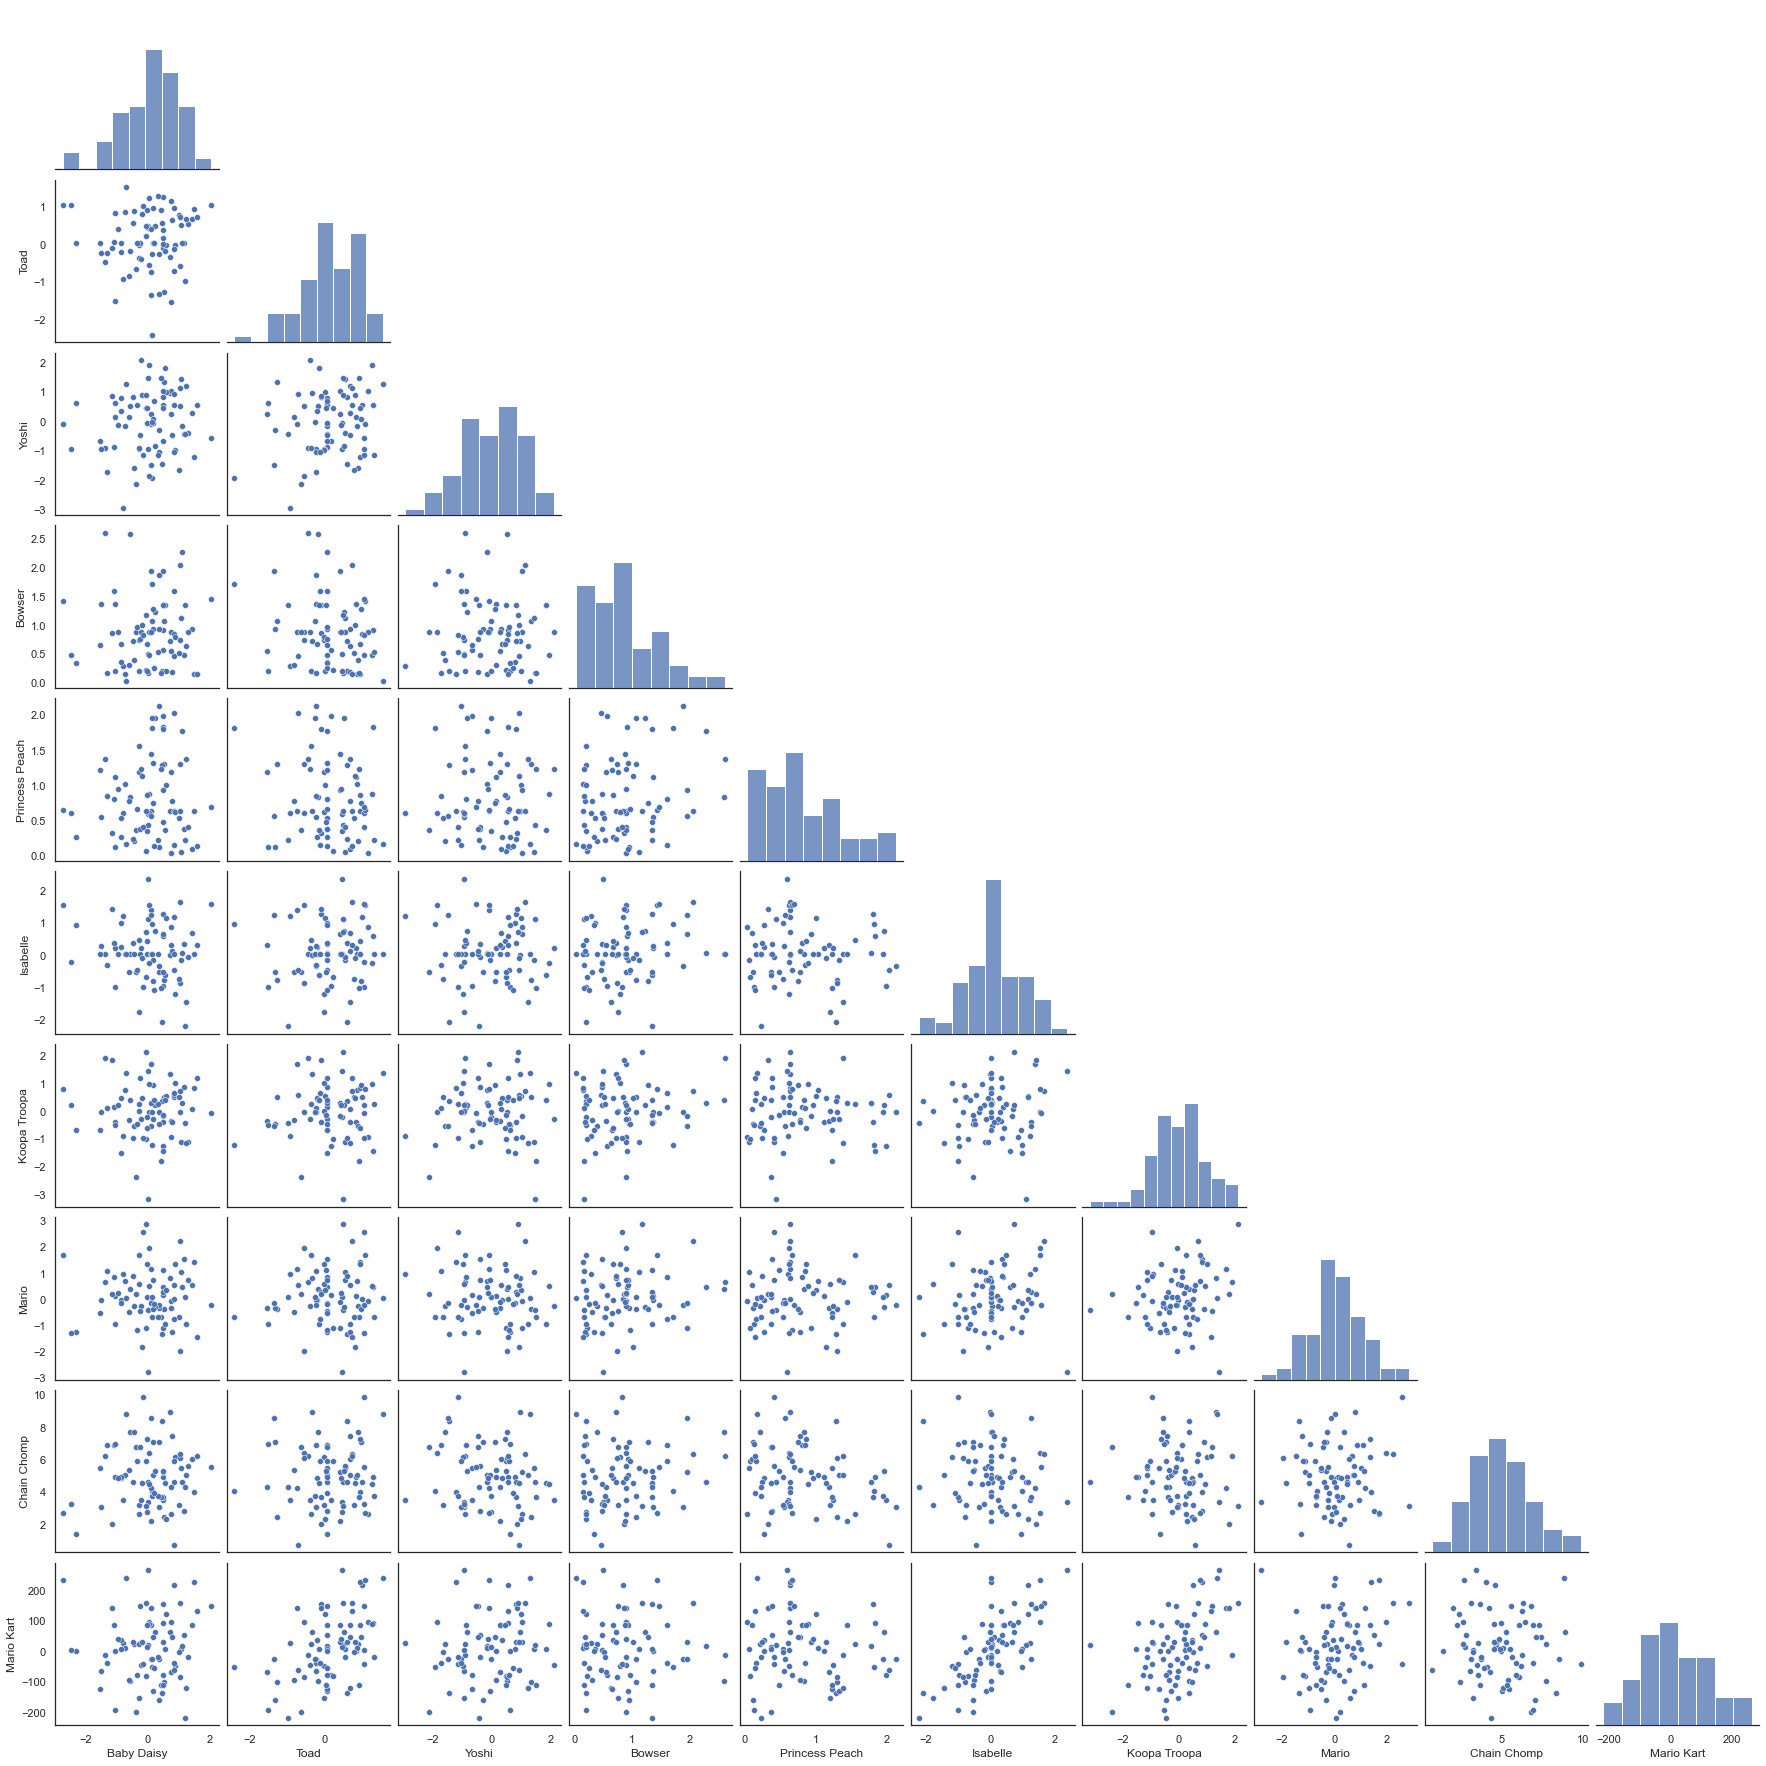

In [36]:
# sns pairplot
import seaborn as sns

eda_data = X_train.copy()
eda_data['Mario Kart'] = y_train

sns.pairplot(data=eda_data, corner=True);

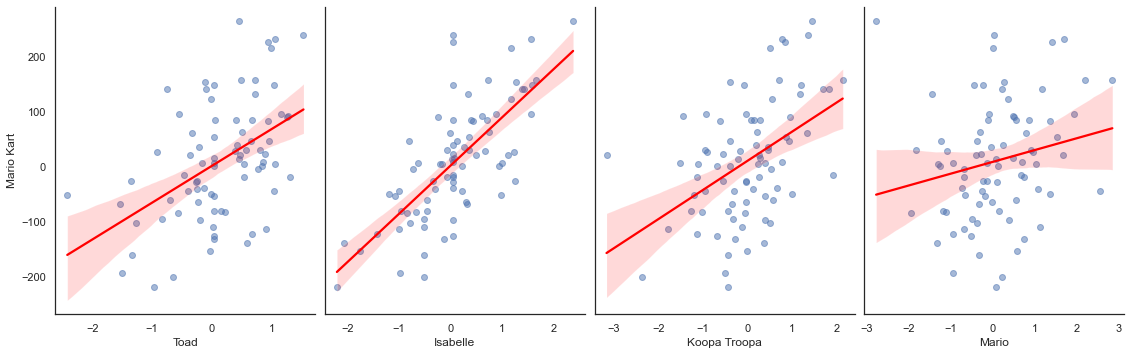

In [37]:
# scatter plots showing correlation
import pandas as pd
import seaborn as sns

# sns.pairplot(data=eda_data, x_vars=['Assignment1', 'Tutorial', 'Midterm', 'Final'], y_vars='FinalGrade', 
sns.pairplot(data=eda_data, x_vars=['Toad', 'Isabelle', 'Koopa Troopa', 'Mario'], y_vars='Mario Kart', 
             kind='reg',
             height=5,
             aspect=0.8, 
             plot_kws={'line_kws':{'color':'red'}, 'scatter_kws': {'alpha': 0.5}});

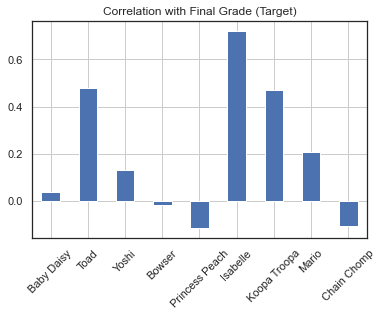

In [38]:
# correlation with target
X_train.corrwith(y_train).plot.bar(
        title = 'Correlation with Final Grade (Target)', rot = 45, grid = True);

## Feature Engineering

### Bi-Label Mapping

In [39]:
# bi-label mapping
# whatever you do for X_train, do for X_test
X_train['Inkling'] = X_train['Inkling'].map({'up':1,'down':0})
X_test['Inkling'] = X_test['Inkling'].map({'up':1,'down':0})

X_train['King Boo'] = X_train['King Boo'].map({'yes':1,'no':0})
X_test['King Boo'] = X_test['King Boo'].map({'yes':1,'no':0})

### One-Hot Encoding

#### Dummy Trap

The dummy variable trap is a scenario in which the independent variables become multicollinear after addition of dummy variables. The value of one variable can be predicted from the values of other variable(s).

In [40]:
# use sklearn one hot encoder
from sklearn.preprocessing import OneHotEncoder

ohe = OneHotEncoder(categories='auto', drop='first', sparse=False, handle_unknown='ignore')

cat_features = ['Wario', 'Cat Peach']
ohe_train = ohe.fit_transform(X_train[cat_features])
ohe_train = pd.DataFrame(ohe_train, columns=ohe.get_feature_names_out(cat_features))
ohe_train.index = X_train.index
X_train = X_train.join(ohe_train)
X_train.drop(cat_features, axis=1, inplace=True)

ohe_test = ohe.transform(X_test[cat_features])
ohe_test = pd.DataFrame(ohe_test, columns=ohe.get_feature_names_out(cat_features))
ohe_test.index = X_test.index
X_test = X_test.join(ohe_test)
X_test.drop(cat_features, axis=1, inplace=True)

print(X_train.shape)
print(X_test.shape)
print(X_train.info())

(80, 17)
(20, 17)
<class 'pandas.core.frame.DataFrame'>
Int64Index: 80 entries, 55 to 51
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Baby Daisy                  80 non-null     float64
 1   Toad                        80 non-null     float64
 2   Yoshi                       80 non-null     float64
 3   Bowser                      80 non-null     float64
 4   Princess Peach              80 non-null     float64
 5   Isabelle                    80 non-null     float64
 6   Koopa Troopa                80 non-null     float64
 7   Mario                       80 non-null     float64
 8   King Boo                    80 non-null     int64  
 9   Inkling                     80 non-null     int64  
 10  Chain Chomp                 80 non-null     float64
 11  Wario_'medium'              80 non-null     float64
 12  Wario_'slow'                80 non-null     float64
 13  Cat Peach_disagree

### Stop Using One-Hot Encoding

# Feature Selection 

## Some Metrics

###  MSE

$\frac{1}{n}\sum(y-\hat{y})^2$

vs.

### Variance (sample)

$\frac{1}{n-1}\sum(x-\bar{x})^2$

In statistics, the mean squared error (MSE) or mean squared deviation (MSD) of an estimator (of a procedure for estimating an unobserved quantity) measures the average of the squares of the errors—that is, the average squared difference between the estimated values and the actual value. MSE is a risk function, corresponding to the expected value of the squared error loss. The fact that MSE is almost always strictly positive (and not zero) is because of randomness or because the estimator does not account for information that could produce a more accurate estimate... The MSE can be written as the sum of the variance of the estimator and the squared bias of the estimator, providing a useful way to calculate the MSE and implying that in the case of unbiased estimators, the MSE and variance are equivalent.

https://en.wikipedia.org/wiki/Mean_squared_error

In datasets with a small spread all values are very close to the mean, resulting in a small variance and standard deviation. Where a dataset is more dispersed, values are spread further away from the mean, leading to a larger variance and standard deviation.

https://www.abs.gov.au/websitedbs/D3310114.nsf/home/statistical+language+-+measures+of+spread

### R Squared

* $SS_{res} = \sum{(y - \hat{y})^2}$
* $SS_{tot} = \sum{(y - \bar{y})^2}$
* $R^2 = 1 - \frac{SS_{res}}{SS_{tot}}$

In statistics, the Pearson correlation coefficient ― also known as Pearson's r ― is a measure of linear correlation between two sets of data. It is the ratio between the covariance of two variables and the product of their standard deviations; thus it is essentially a normalized measurement of the covariance, such that the result always has a value between −1 and 1. As with covariance itself, the measure can only reflect a linear correlation of variables, and ignores many other types of relationship or correlation. As a simple example, one would expect the age and height of a sample of teenagers from a high school to have a Pearson correlation coefficient significantly greater than 0, but less than 1 (as 1 would represent an unrealistically perfect correlation).

https://en.wikipedia.org/wiki/Pearson_correlation_coefficient

In statistics, the coefficient of determination, denoted R2 or r2 and pronounced "R squared", is the proportion of the variation in the dependent variable that is predictable from the independent variable(s).

https://en.wikipedia.org/wiki/Coefficient_of_determination

* r shows correlation between x and y
* r squared shows strength of model, the proportion of the variance y that can be explained by X in a linear regression model

### Adjusted R Squared

Features are considered

* $Adj R^2 = 1 - (1 - R^2)\frac{n-1}{n-p-1}$ where p = number of features and n = size of dataset
* $R^2$ will never decrease adding more features
* Adj R squared accounts for relevant features 
* Adjusted $R^2$ will be influenced by an increase of $p$

### MSE or R Squared

It is recommended to use R-Squared or rather adjusted R-Squared for evaluating the model performance of the regression models. This is primarily because R-Squared captures the fraction of variance of actual values captured by the regression model and tends to give a better picture of the quality of the regression model. Also, MSE values differ based on whether the values of the response variable are scaled or not. A better measure instead of MSE is the root mean squared error (RMSE) which takes care of the fact related to whether the values of the response variable are scaled or not.

https://vitalflux.com/mean-square-error-r-squared-which-one-to-use/

### Cost or Loss Function

In mathematical optimization and decision theory, a loss function or cost function (sometimes also called an error function) is a function that maps an event or values of one or more variables onto a real number intuitively representing some "cost" associated with the event. An optimization problem seeks to minimize a loss function. An objective function is either a loss function or its opposite (in specific domains, variously called a reward function, a profit function, a utility function, a fitness function, etc.), in which case it is to be maximized.

We often use MSE as our cost function in linear regression $mse = \frac{\sum(y-\hat{y})^2}{n}$.

https://en.wikipedia.org/wiki/Loss_function

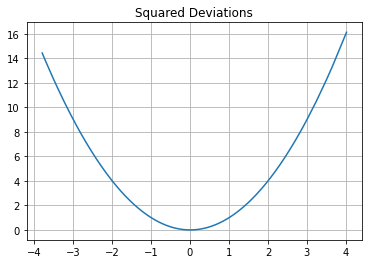

The mean of our data is 0.0.


In [1]:
# visualizing deviations from the mean squared
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats.distributions import norm

data = norm.rvs(size=10000)
x = sorted(np.array(data))
y = [(i - np.mean(x))**2 for i in x]
plt.title('Squared Deviations') 
plt.plot(x, y)
plt.grid()
plt.show()

print(f'The mean of our data is {round(np.mean(data), 2)}.')

# Statsmodels and Ordinary Least Squares

In statistics, ordinary least squares (OLS) is a type of linear least squares method for estimating the unknown parameters in a linear regression model. OLS chooses the parameters of a linear function of a set of explanatory variables by the principle of least squares: minimizing the sum of the squares of the differences between the observed dependent variable (values of the variable being observed) in the given dataset and those predicted by the linear function of the independent variable.

https://en.wikipedia.org/wiki/Ordinary_least_squares

## Adding a Constant (or Intercept)

As a rule, the constant term is always included in the set of regressors X ...

https://en.wikipedia.org/wiki/Ordinary_least_squares

The intercept (often labeled the constant) is the expected mean value of y when all X=0.

https://www.theanalysisfactor.com/interpreting-the-intercept-in-a-regression-model/

Immediately above, we saw a key reason why you should include the constant in your regression model. It guarantees that your residuals have a mean of zero. Additionally, if you don’t include the constant, the regression line is forced to go through the origin. This means that all of the predictors and the response variable must equal zero at that point. If your fitted line doesn’t naturally go through the origin, your regression coefficients and predictions will be biased if you don't include the constant.

https://blog.minitab.com/en/adventures-in-statistics-2/regression-analysis-how-to-interpret-the-constant-y-intercept

In [42]:
# delete a bunch for 
# whatever you do for X_train, do for X_test
drop_demo = ['Cat Peach_neutral', 
              'Cat Peach_kind of disagree', 
              'Cat Peach_kind of agree',
              'Cat Peach_disagree',
              'Wario_\'slow\'',
              'Wario_\'medium\'',
              'Chain Chomp',
              'Inkling'
             ]

X_train.drop(drop_demo, axis=1, inplace=True)
X_test.drop(drop_demo, axis=1, inplace=True)

In [43]:
import statsmodels.api as sm

# what ever we do for X_train, do for X_test
X_train.insert(0, 'const', 1)
X_test.insert(0, 'const', 1)
model = sm.OLS(y_train, X_train).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             Mario Kart   R-squared:                       0.858
Model:                            OLS   Adj. R-squared:                  0.840
Method:                 Least Squares   F-statistic:                     47.17
Date:                Thu, 06 Oct 2022   Prob (F-statistic):           3.08e-26
Time:                        20:05:15   Log-Likelihood:                -408.46
No. Observations:                  80   AIC:                             836.9
Df Residuals:                      70   BIC:                             860.7
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const             13.1823     11.496      1.147      0.255      -9.745      36.109
Baby Daisy        13.0264      5.291      2.462      0.016       2.474      23.579
Toad              52.5682      6.788      7.745      0.000      39.031      66.106
Yoshi              2.6182      4.800      0.545      0.587      -6.955      12.191
Bowser           -22.7064      8.970     -2.531      0.014     -40.597      -4.815
Princess Peach     4.8512      9.089      0.534      0.595     -13.276      22.978
Isabelle          82.9808      5.731     14.479      0.000      71.551      94.411
Koopa Troopa      40.7168      5.329      7.641      0.000      30.088      51.345
Mario              5.3300      4.987      1.069      0.289      -4.616      15.276
King Boo          -4.2191     10.255     -0.411      0.682     -24.672      16.234
==============================================================================
Omnibus:                        4.426   Durbin-Watson:                   2.114
Prob(Omnibus):                  0.109   Jarque-Bera (JB):                4.968
Skew:                           0.186   Prob(JB):                       0.0834
Kurtosis:                       4.163   Cond. No.                         5.03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

## OLS Regression Results Explanation

* Endog(enous): Similar to the dependent variable
* Exog(enous): Similar to the independent variable

https://www.statisticshowto.com/endogenous-variable/

### Model Info
* Dep. Varialble: the response variable, dependent, outcome, etc.
* Model: what model are we using (ordinary least squares) for the training
* Method: how the parameters (coefficients) were calculated
* No. Observations: the number of observations, rows... (n)
* DF Residuals: degrees of freedom of the residuals
* DF Model: number of parameters in the model excluding the constant if present
* Covariance Type: deals with violations of assumptions

### Goodness of Fit
* R-Squared: coefficient of determination, how well the regression fits the data
* Adj R-Squared: R-squared adjustment based on number of parameters and df residuals
* F statistic: a measure of how significant the fit is
* Prop F statistic: the probability that you would get the F stat given the null hypothesis
* Log-Liklihood: can be used to compare the fit of different coefficients, the higher valur is better
* AIC: Akaike Information Criterion is used to compare models, a lower score is better (doesn't address features, just the overall model)
* BIC: Bayesian Information Criterion is similar to AIC but uses a higher penalty

### Coefficients
* coef: the estimated value of the coefficient
* std error: the basic standard error of the estimate of the coefficient
* t: the t-statistic value, how significant the coefficient is
* P>|t|: the p-value, indicates a statistically significant relationship to the dependent variable if less than the confidence level, usually 0.05
* 95% confidence interval: the lower and upper values

### Statistical Tests
* Skewness: A measure of the symmetry of the data about the mean 
* Kurtosis: A measure of the shape of the data 
* Omnibus: D'Angostino's test provides a combined test for the presence of skewness and kurtosis
* Prob(Omnibus): probability of Omnibus
* Jarque-Bera: Another test for skewness and kurtosis
* Prob(Jarque-Bera): probability of Jarque-Bera
* Durbin-Watson: A test for the presence of autocorrelation, if the errors aren't independent
* Cond No: A test for multicollinearity

# Back to Variance Digression: Example

https://www.analyticsvidhya.com/blog/2021/04/beginners-guide-to-low-variance-filter-and-its-implementation/

See Week 07 - Variance notebook

## Stepwise Procedures

* Backward Elimination: involves starting with all candidate variables, testing the deletion of each variable using a chosen model fit criterion, deleting the variable (if any) whose loss gives the most statistically insignificant deterioration of the model fit, and repeating this process until no further variables can be deleted without a statistically insignificant loss of fit.
* Forward Selection: involves starting with no variables in the model, testing the addition of each variable using a chosen model fit criterion, adding the variable (if any) whose inclusion gives the most statistically significant improvement of the fit, and repeating this process until none improves the model to a statistically significant extent.
* Mixed Selection: a combination of the above, testing at each step for variables to be included or excluded.

## Backward Elimination Process

* Note Adj R-squared
* AIC
* BIC
* Note P>|t| greater than 0.05

Let's get rid of the feature with the highest P>|t| and run it again to see if anything improves

**AIC**: The Akaike information criterion (AIC) is an estimator of prediction error and thereby relative quality of statistical models for a given set of data. Given a collection of models for the data, AIC estimates the quality of each model, relative to each of the other models. Thus, AIC provides a means for model selection.

https://en.wikipedia.org/wiki/Akaike_information_criterion

**BIC**: In statistics, the Bayesian information criterion (BIC) or Schwarz information criterion (also SIC, SBC, SBIC) is a criterion for model selection among a finite set of models; models with lower BIC are generally preferred. It is based, in part, on the likelihood function and it is closely related to the Akaike information criterion (AIC).

https://en.wikipedia.org/wiki/Bayesian_information_criterion

In [44]:
# review model summary
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             Mario Kart   R-squared:                       0.858
Model:                            OLS   Adj. R-squared:                  0.840
Method:                 Least Squares   F-statistic:                     47.17
Date:                Thu, 06 Oct 2022   Prob (F-statistic):           3.08e-26
Time:                        20:05:15   Log-Likelihood:                -408.46
No. Observations:                  80   AIC:                             836.9
Df Residuals:                      70   BIC:                             860.7
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const             13.1823     11.496      1.147      0.255      -9.745      36.109
Baby Daisy        13.0264      5.291      2.462      0.016       2.474      23.579
Toad              52.5682      6.788      7.745      0.000      39.031      66.106
Yoshi              2.6182      4.800      0.545      0.587      -6.955      12.191
Bowser           -22.7064      8.970     -2.531      0.014     -40.597      -4.815
Princess Peach     4.8512      9.089      0.534      0.595     -13.276      22.978
Isabelle          82.9808      5.731     14.479      0.000      71.551      94.411
Koopa Troopa      40.7168      5.329      7.641      0.000      30.088      51.345
Mario              5.3300      4.987      1.069      0.289      -4.616      15.276
King Boo          -4.2191     10.255     -0.411      0.682     -24.672      16.234
==============================================================================
Omnibus:                        4.426   Durbin-Watson:                   2.114
Prob(Omnibus):                  0.109   Jarque-Bera (JB):                4.968
Skew:                           0.186   Prob(JB):                       0.0834
Kurtosis:                       4.163   Cond. No.                         5.03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [45]:
model = sm.OLS(y_train, X_train.drop(['King Boo'], axis=1)).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             Mario Kart   R-squared:                       0.858
Model:                            OLS   Adj. R-squared:                  0.842
Method:                 Least Squares   F-statistic:                     53.68
Date:                Thu, 06 Oct 2022   Prob (F-statistic):           4.40e-27
Time:                        20:05:15   Log-Likelihood:                -408.56
No. Observations:                  80   AIC:                             835.1
Df Residuals:                      71   BIC:                             856.6
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const             11.4411     10.625      1.077      0.285      -9.745      32.628
Baby Daisy        13.0366      5.260      2.478      0.016       2.548      23.525
Toad              52.0788      6.643      7.839      0.000      38.832      65.325
Yoshi              2.7650      4.759      0.581      0.563      -6.723      12.253
Bowser           -23.1310      8.859     -2.611      0.011     -40.795      -5.468
Princess Peach     4.5785      9.012      0.508      0.613     -13.390      22.547
Isabelle          82.8197      5.684     14.571      0.000      71.486      94.153
Koopa Troopa      41.1498      5.193      7.923      0.000      30.794      51.505
Mario              5.8031      4.824      1.203      0.233      -3.815      15.422
==============================================================================
Omnibus:                        4.410   Durbin-Watson:                   2.092
Prob(Omnibus):                  0.110   Jarque-Bera (JB):                4.747
Skew:                           0.216   Prob(JB):                       0.0932
Kurtosis:                       4.113   Cond. No.                         4.55
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [46]:
model = sm.OLS(y_train, X_train.drop(['King Boo', 'Princess Peach'], axis=1)).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             Mario Kart   R-squared:                       0.858
Model:                            OLS   Adj. R-squared:                  0.844
Method:                 Least Squares   F-statistic:                     61.95
Date:                Thu, 06 Oct 2022   Prob (F-statistic):           6.09e-28
Time:                        20:05:15   Log-Likelihood:                -408.70
No. Observations:                  80   AIC:                             833.4
Df Residuals:                      72   BIC:                             852.5
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const           14.3266      8.934      1.604      0.113      -3.483      32.136
Baby Daisy      13.1733      5.226      2.521      0.014       2.756      23.591
Toad            51.7323      6.574      7.869      0.000      38.627      64.838
Yoshi            2.7184      4.733      0.574      0.568      -6.717      12.154
Bowser         -22.1203      8.588     -2.576      0.012     -39.240      -5.001
Isabelle        82.6000      5.638     14.650      0.000      71.360      93.840
Koopa Troopa    41.0171      5.160      7.949      0.000      30.731      51.303
Mario            5.7445      4.798      1.197      0.235      -3.819      15.308
==============================================================================
Omnibus:                        4.218   Durbin-Watson:                   2.091
Prob(Omnibus):                  0.121   Jarque-Bera (JB):                4.304
Skew:                           0.230   Prob(JB):                        0.116
Kurtosis:                       4.039   Cond. No.                         3.66
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [47]:
model = sm.OLS(y_train, X_train.drop(['King Boo', 'Princess Peach', 'Yoshi'], axis=1)).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             Mario Kart   R-squared:                       0.857
Model:                            OLS   Adj. R-squared:                  0.845
Method:                 Least Squares   F-statistic:                     72.88
Date:                Thu, 06 Oct 2022   Prob (F-statistic):           8.01e-29
Time:                        20:05:15   Log-Likelihood:                -408.89
No. Observations:                  80   AIC:                             831.8
Df Residuals:                      73   BIC:                             848.4
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const           14.1371      8.887      1.591      0.116      -3.574      31.848
Baby Daisy      13.5614      5.158      2.629      0.010       3.281      23.842
Toad            52.4797      6.414      8.181      0.000      39.696      65.264
Bowser         -22.0973      8.548     -2.585      0.012     -39.134      -5.061
Isabelle        82.6725      5.611     14.734      0.000      71.490      93.855
Koopa Troopa    41.0933      5.135      8.003      0.000      30.860      51.326
Mario            5.4227      4.743      1.143      0.257      -4.030      14.875
==============================================================================
Omnibus:                        3.928   Durbin-Watson:                   2.077
Prob(Omnibus):                  0.140   Jarque-Bera (JB):                4.011
Skew:                           0.190   Prob(JB):                        0.135
Kurtosis:                       4.029   Cond. No.                         3.65
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [48]:
model = sm.OLS(y_train, X_train.drop(['King Boo', 'Princess Peach', 'Yoshi', 'Mario'], axis=1)).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             Mario Kart   R-squared:                       0.854
Model:                            OLS   Adj. R-squared:                  0.845
Method:                 Least Squares   F-statistic:                     86.84
Date:                Thu, 06 Oct 2022   Prob (F-statistic):           1.55e-29
Time:                        20:05:15   Log-Likelihood:                -409.60
No. Observations:                  80   AIC:                             831.2
Df Residuals:                      74   BIC:                             845.5
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const           13.3292      8.877      1.502      0.137      -4.359      31.017
Baby Daisy      13.5523      5.169      2.622      0.011       3.253      23.852
Toad            52.9452      6.415      8.254      0.000      40.163      65.727
Bowser         -20.7807      8.488     -2.448      0.017     -37.693      -3.868
Isabelle        83.3905      5.587     14.925      0.000      72.258      94.523
Koopa Troopa    41.6840      5.119      8.143      0.000      31.484      51.884
==============================================================================
Omnibus:                        3.872   Durbin-Watson:                   2.108
Prob(Omnibus):                  0.144   Jarque-Bera (JB):                3.784
Skew:                           0.216   Prob(JB):                        0.151
Kurtosis:                       3.974   Cond. No.                         3.58
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [49]:
model = sm.OLS(y_train, X_train.drop(['King Boo', 'Princess Peach', 'Yoshi', 'Mario', 'Bowser'], axis=1)).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             Mario Kart   R-squared:                       0.843
Model:                            OLS   Adj. R-squared:                  0.834
Method:                 Least Squares   F-statistic:                     100.4
Date:                Thu, 06 Oct 2022   Prob (F-statistic):           2.52e-29
Time:                        20:05:15   Log-Likelihood:                -412.71
No. Observations:                  80   AIC:                             835.4
Df Residuals:                      75   BIC:                             847.3
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const           -4.9369      4.968     -0.994      0.324     -14.833       4.959
Baby Daisy      12.5382      5.321      2.356      0.021       1.938      23.138
Toad            56.4471      6.458      8.740      0.000      43.582      69.312
Isabelle        81.0112      5.682     14.257      0.000      69.691      92.331
Koopa Troopa    39.8926      5.233      7.624      0.000      29.469      50.316
==============================================================================
Omnibus:                        4.012   Durbin-Watson:                   2.134
Prob(Omnibus):                  0.135   Jarque-Bera (JB):                4.537
Skew:                           0.107   Prob(JB):                        0.103
Kurtosis:                       4.147   Cond. No.                         1.43
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

## Forward Selection Process

Start with the lowest alphas

* Note Adj r-squared
* AIC
* BIC

**AIC**: The Akaike information criterion (AIC) is an estimator of prediction error and thereby relative quality of statistical models for a given set of data. Given a collection of models for the data, AIC estimates the quality of each model, relative to each of the other models. Thus, AIC provides a means for model selection.

https://en.wikipedia.org/wiki/Akaike_information_criterion

**BIC**: In statistics, the Bayesian information criterion (BIC) or Schwarz information criterion (also SIC, SBC, SBIC) is a criterion for model selection among a finite set of models; models with lower BIC are generally preferred. It is based, in part, on the likelihood function and it is closely related to the Akaike information criterion (AIC).

https://en.wikipedia.org/wiki/Bayesian_information_criterion

In [50]:
# forward selection
model = sm.OLS(y_train, X_train[['Toad']]).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:             Mario Kart   R-squared (uncentered):                   0.238
Model:                            OLS   Adj. R-squared (uncentered):              0.228
Method:                 Least Squares   F-statistic:                              24.61
Date:                Thu, 06 Oct 2022   Prob (F-statistic):                    3.94e-06
Time:                        20:05:15   Log-Likelihood:                         -476.25
No. Observations:                  80   AIC:                                      954.5
Df Residuals:                      79   BIC:                                      956.9
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Toad          67.5922     13.625      4.961      0.000      40.473      94.711
==============================================================================
Omnibus:                        1.212   Durbin-Watson:                   1.808
Prob(Omnibus):                  0.546   Jarque-Bera (JB):                1.245
Skew:                           0.212   Prob(JB):                        0.536
Kurtosis:                       2.560   Cond. No.                         1.00
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [51]:
# forward selection
model = sm.OLS(y_train, X_train[['Toad', 'Isabelle']]).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:             Mario Kart   R-squared (uncentered):                   0.710
Model:                            OLS   Adj. R-squared (uncentered):              0.703
Method:                 Least Squares   F-statistic:                              95.46
Date:                Thu, 06 Oct 2022   Prob (F-statistic):                    1.09e-21
Time:                        20:05:15   Log-Likelihood:                         -437.59
No. Observations:                  80   AIC:                                      879.2
Df Residuals:                      78   BIC:                                      884.0
Df Model:                           2                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Toad          59.8903      8.485      7.059      0.000      42.999      76.782
Isabelle      83.8912      7.443     11.271      0.000      69.073      98.709
==============================================================================
Omnibus:                        4.095   Durbin-Watson:                   1.966
Prob(Omnibus):                  0.129   Jarque-Bera (JB):                3.382
Skew:                           0.375   Prob(JB):                        0.184
Kurtosis:                       3.671   Cond. No.                         1.17
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [52]:
# forward selection
model = sm.OLS(y_train, X_train[['Toad', 'Isabelle', 'Koopa Troopa']]).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:             Mario Kart   R-squared (uncentered):                   0.831
Model:                            OLS   Adj. R-squared (uncentered):              0.825
Method:                 Least Squares   F-statistic:                              126.4
Date:                Thu, 06 Oct 2022   Prob (F-statistic):                    1.16e-29
Time:                        20:05:15   Log-Likelihood:                         -415.94
No. Observations:                  80   AIC:                                      837.9
Df Residuals:                      77   BIC:                                      845.0
Df Model:                           3                                                  
Covariance Type:            nonrobust                                                  
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Toad            56.4040      6.532      8.635      0.000      43.398      69.410
Isabelle        78.7222      5.757     13.674      0.000      67.258      90.186
Koopa Troopa    39.9734      5.375      7.436      0.000      29.270      50.677
==============================================================================
Omnibus:                        4.398   Durbin-Watson:                   2.106
Prob(Omnibus):                  0.111   Jarque-Bera (JB):                5.465
Skew:                           0.064   Prob(JB):                       0.0651
Kurtosis:                       4.274   Cond. No.                         1.29
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [53]:
# forward selection
model = sm.OLS(y_train, X_train[['Toad', 'Isabelle', 'Koopa Troopa', 'Baby Daisy']]).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:             Mario Kart   R-squared (uncentered):                   0.842
Model:                            OLS   Adj. R-squared (uncentered):              0.834
Method:                 Least Squares   F-statistic:                              101.4
Date:                Thu, 06 Oct 2022   Prob (F-statistic):                    1.10e-29
Time:                        20:05:15   Log-Likelihood:                         -413.23
No. Observations:                  80   AIC:                                      834.5
Df Residuals:                      76   BIC:                                      844.0
Df Model:                           4                                                  
Covariance Type:            nonrobust                                                  
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Toad            55.3969      6.371      8.696      0.000      42.709      68.085
Isabelle        80.4106      5.650     14.233      0.000      69.158      91.663
Koopa Troopa    40.0176      5.231      7.651      0.000      29.600      50.435
Baby Daisy      12.2597      5.313      2.307      0.024       1.677      22.842
==============================================================================
Omnibus:                        4.206   Durbin-Watson:                   2.104
Prob(Omnibus):                  0.122   Jarque-Bera (JB):                4.846
Skew:                           0.126   Prob(JB):                       0.0887
Kurtosis:                       4.179   Cond. No.                         1.33
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [54]:
# forward selection
model = sm.OLS(y_train, X_train[['Toad', 'Isabelle', 'Koopa Troopa', 'Baby Daisy', 'Bowser']]).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:             Mario Kart   R-squared (uncentered):                   0.852
Model:                            OLS   Adj. R-squared (uncentered):              0.842
Method:                 Least Squares   F-statistic:                              86.05
Date:                Thu, 06 Oct 2022   Prob (F-statistic):                    1.23e-29
Time:                        20:05:15   Log-Likelihood:                         -410.80
No. Observations:                  80   AIC:                                      831.6
Df Residuals:                      75   BIC:                                      843.5
Df Model:                           5                                                  
Covariance Type:            nonrobust                                                  
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Toad            55.5828      6.221      8.935      0.000      43.190      67.976
Isabelle        82.6402      5.611     14.728      0.000      71.462      93.818
Koopa Troopa    40.6615      5.116      7.948      0.000      30.470      50.853
Baby Daisy      13.2504      5.208      2.544      0.013       2.875      23.625
Bowser         -10.0692      4.638     -2.171      0.033     -19.308      -0.831
==============================================================================
Omnibus:                        3.958   Durbin-Watson:                   2.107
Prob(Omnibus):                  0.138   Jarque-Bera (JB):                4.219
Skew:                           0.159   Prob(JB):                        0.121
Kurtosis:                       4.079   Cond. No.                         1.48
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [55]:
# forward selection
model = sm.OLS(y_train, X_train[['Toad', 'Isabelle', 'Koopa Troopa', 'Baby Daisy', 'Bowser', 'Mario']]).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:             Mario Kart   R-squared (uncentered):                   0.854
Model:                            OLS   Adj. R-squared (uncentered):              0.842
Method:                 Least Squares   F-statistic:                              71.90
Date:                Thu, 06 Oct 2022   Prob (F-statistic):                    7.30e-29
Time:                        20:05:15   Log-Likelihood:                         -410.25
No. Observations:                  80   AIC:                                      832.5
Df Residuals:                      74   BIC:                                      846.8
Df Model:                           6                                                  
Covariance Type:            nonrobust                                                  
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Toad            55.3109      6.226      8.884      0.000      42.905      67.717
Isabelle        81.9612      5.651     14.505      0.000      70.702      93.220
Koopa Troopa    40.0810      5.147      7.787      0.000      29.825      50.338
Baby Daisy      13.2422      5.207      2.543      0.013       2.866      23.618
Bowser         -10.6627      4.674     -2.281      0.025     -19.976      -1.349
Mario            4.8227      4.776      1.010      0.316      -4.694      14.340
==============================================================================
Omnibus:                        4.017   Durbin-Watson:                   2.086
Prob(Omnibus):                  0.134   Jarque-Bera (JB):                4.448
Skew:                           0.132   Prob(JB):                        0.108
Kurtosis:                       4.124   Cond. No.                         1.59
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

AIC and BIC both are trending up 

# Regularization

* Penalizes complex models to avoid overfitting
* More on overfitting and underfitting next week

https://blog.datadive.net/selecting-good-features-part-ii-linear-models-and-regularization/

In mathematics, statistics, finance, computer science, particularly in machine learning and inverse problems, regularization is the process of adding information in order to solve an ill-posed problem or to prevent overfitting. Regularization can be applied to objective functions in ill-posed optimization problems. The regularization term, or penalty, imposes a cost on the optimization function to make the optimal solution unique.

https://en.wikipedia.org/wiki/Regularization_(mathematics)



## Lasso / l1 Regularization

* $\alpha = \sum|w_i|$
* Forces weak features to have zero coefficients
* Performs feature selection
* Models can be unstable (coefficients fluctuate significantly on data changes with correlated features)

In [56]:
# lasso example
from sklearn.linear_model import Lasso
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X = scaler.fit_transform(X_train)
y = y_train
names = X_train.columns
  
lasso = Lasso(alpha=8)
lasso.fit(X, y)

d = {'Feature': names, 'Coeff': lasso.coef_}
lasso_df = pd.DataFrame(d)
print(lasso_df[1:])

          Feature      Coeff
1      Baby Daisy   2.897580
2            Toad  35.848253
3           Yoshi   0.000000
4          Bowser  -1.790972
5  Princess Peach  -0.000000
6        Isabelle  62.992643
7    Koopa Troopa  31.125638
8           Mario   0.000000
9        King Boo  -0.000000


### Selected Features

<pre>
['Isabelle', 'Toad', 'Bowser', 'Koopa Troopa', 'Baby Daisy']
</pre>

In [57]:
# what ever you do for X_train do for X_test
X_train = X_train[['Isabelle', 'Toad', 'Bowser', 'Koopa Troopa', 'Baby Daisy']]
X_test = X_test[['Isabelle', 'Toad', 'Bowser', 'Koopa Troopa', 'Baby Daisy']]

In [58]:
X_train.insert(0, 'const', 1)
model = sm.OLS(y_train, X_train).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             Mario Kart   R-squared:                       0.854
Model:                            OLS   Adj. R-squared:                  0.845
Method:                 Least Squares   F-statistic:                     86.84
Date:                Thu, 06 Oct 2022   Prob (F-statistic):           1.55e-29
Time:                        20:05:15   Log-Likelihood:                -409.60
No. Observations:                  80   AIC:                             831.2
Df Residuals:                      74   BIC:                             845.5
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const           13.3292      8.877      1.502      0.137      -4.359      31.017
Isabelle        83.3905      5.587     14.925      0.000      72.258      94.523
Toad            52.9452      6.415      8.254      0.000      40.163      65.727
Bowser         -20.7807      8.488     -2.448      0.017     -37.693      -3.868
Koopa Troopa    41.6840      5.119      8.143      0.000      31.484      51.884
Baby Daisy      13.5523      5.169      2.622      0.011       3.253      23.852
==============================================================================
Omnibus:                        3.872   Durbin-Watson:                   2.108
Prob(Omnibus):                  0.144   Jarque-Bera (JB):                3.784
Skew:                           0.216   Prob(JB):                        0.151
Kurtosis:                       3.974   Cond. No.                         3.58
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

## Assumptions Check

* https://www.statisticssolutions.com/free-resources/directory-of-statistical-analyses/assumptions-of-linear-regression/

### Collinearity and Homoscedasticity

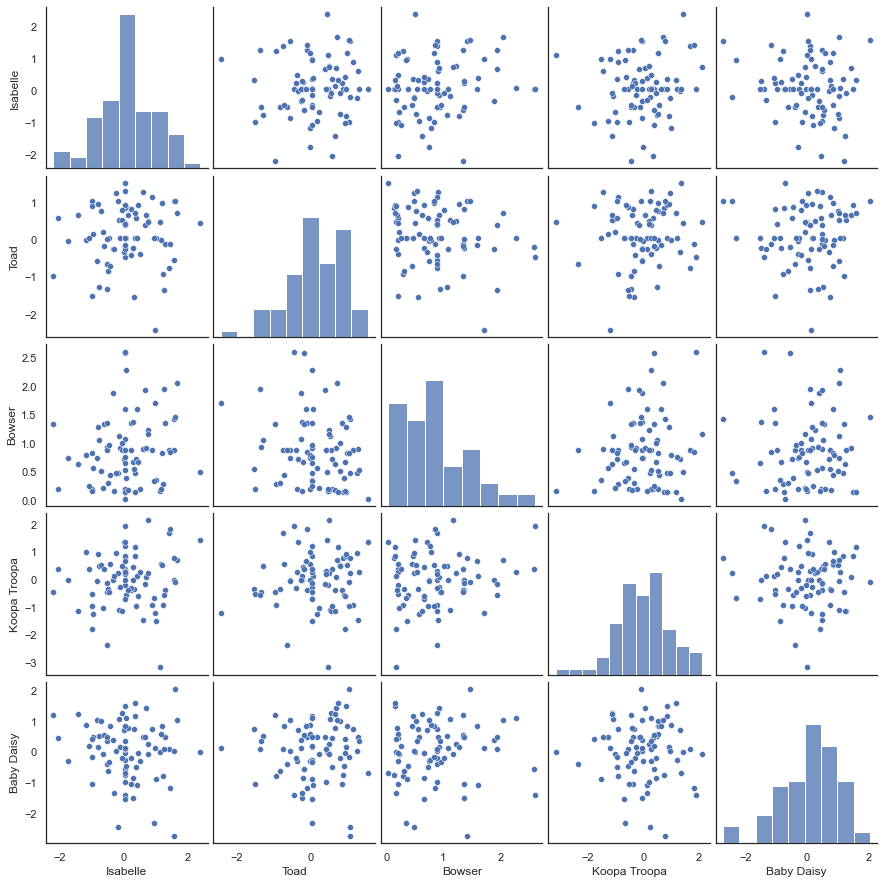

In [59]:
# pairplot checks for collinearity and homoscedasticity
# show relationships between two featurs
sns.pairplot(X_train.drop('const', axis=1));

### Partial Regression Plot

A subplot is created for each explanatory variable given by exog_idx. The partial regression plot shows the relationship between the response and the given explanatory variable after removing the effect of all other explanatory variables in exog.

https://www.statsmodels.org/devel/generated/statsmodels.graphics.regressionplots.plot_partregress_grid.html

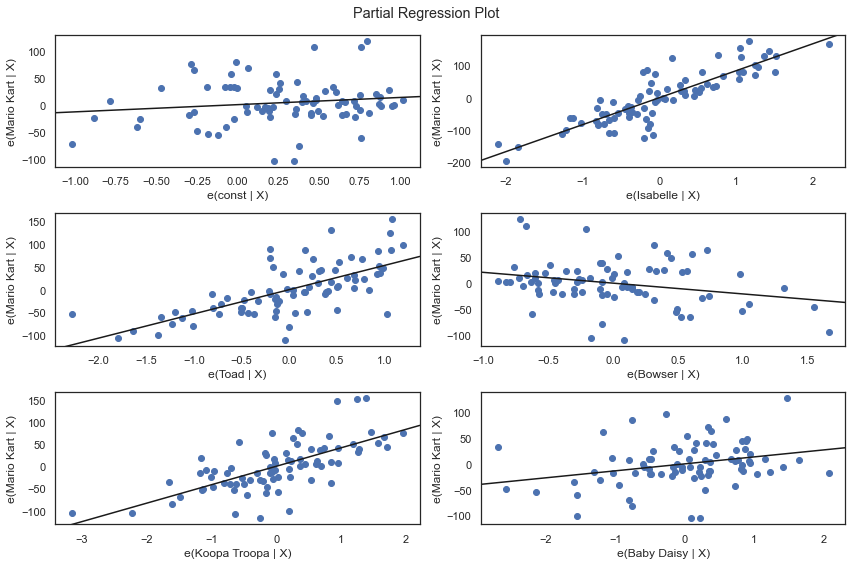

In [60]:
# https://www.kirenz.com/post/2021-11-14-linear-regression-diagnostics-in-python/linear-regression-diagnostics-in-python/
# check for linearity and homoscedasticity
import matplotlib.pyplot as plt
import statsmodels.api as sm

fig = plt.figure(figsize=(12,8))
fig = sm.graphics.plot_partregress_grid(model, fig=fig)
plt.tight_layout();

### graphics.plot_regress_exog

* dependent variable and fitted values with prediction confidence intervals vs. the independent variable chosen
* the residuals of the model vs. the chosen independent variable
* a partial regression plot, and a
* CCPR plot: The CCPR (component and component-plus-residual plot) provides a way to judge the effect of one regressor on the response variable by taking into account the effects of the other independent variables.

Plot regression results against one regressor

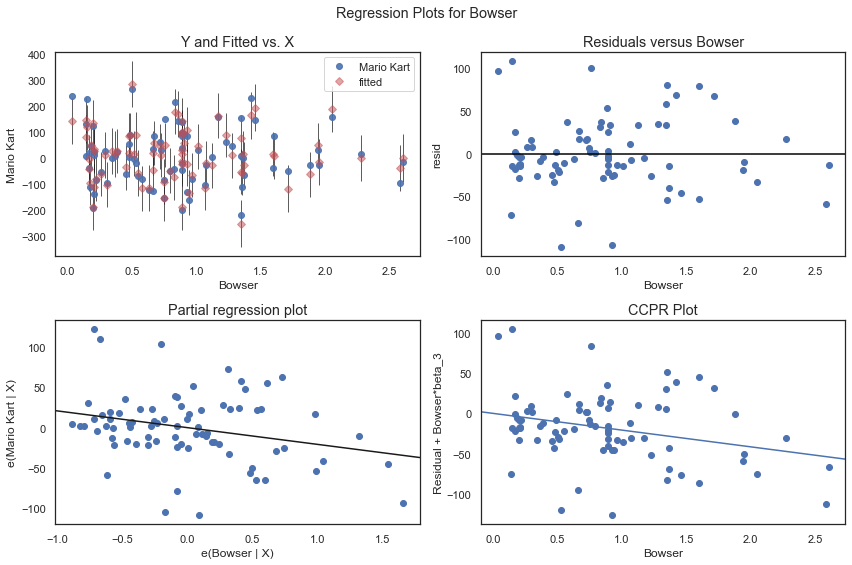

In [61]:
# ccpr checks linear relationship with the dependent variable
fig = plt.figure(figsize=(12,8))
fig = sm.graphics.plot_regress_exog(model, 'Bowser', fig=fig)
plt.tight_layout();

### More on Normality Testing

https://towardsdatascience.com/normality-testing-the-graphical-way-20902abd8543

## Sklearn Linear Regression Model

In [62]:
# create and train the model
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

model = LinearRegression()
model.fit(X_train.drop('const', axis=1), y_train)

# test set prediction results
yhat = model.predict(X_test)
print(f'MSE: {mean_squared_error(y_true=y_test, y_pred=yhat)}')
print(f'R-Squared: {r2_score(y_test, yhat)}')

MSE: 2699.6111586854304
R-Squared: 0.686708843056762


In [63]:
# view the coefficients and intercept
print(list(zip(X_train, model.coef_)))
print(model.intercept_)

[('const', 83.39051896251596), ('Isabelle', 52.94520853909812), ('Toad', -20.780699246998118), ('Bowser', 41.68397683166546), ('Koopa Troopa', 13.552276831685635)]
13.329162647863658


**Model.fit()**: How the model learns, trains, from the provided data to get the coefficients

**R-Squared**: The R-squared value of 90% shows that our model features have a large positive linear relationship with the outcome variable

**Interpreting a coefficient**: \\$1000 dollars on radio advertising would be associated with an increase of sales by 0.19 * 1000, or 190 units, given radio and newspaper spending stays the same.

## Confidence Intervals

* variance
* samples

We are more confident when numbers are closer together
* (1, ?, 500)
* (2.9, ?, 3.1)

What are we more confident with?
* Coin flip of 10, mean = 0.6
* Coin flip of 1000, mean = 0.6

Two things affect our confidence
* How spread out the distribution (more spread out, less confident)
* Number of samples

Significance and Confidence Levels
* Flip a coin 100 times and calculate results
* Flip another coin 100 times and calculate results
* Is one coin better than the other? Do they have the same results?

Again: Number of samples collected and variance of samples

Factors affecting statistical significance
* Variance
* Effect size (difference in means)
* Sample size

https://aegis4048.github.io/comprehensive_confidence_intervals_for_python_developers

Check out the conclusion to this article: https://www.mathsisfun.com/data/confidence-interval.html

A confidence interval is the mean of your estimate plus and minus the variation in that estimate. This is the range of values you expect your estimate to fall between if you redo your test, within a certain level of confidence. Confidence, in statistics, is another way to describe probability.

https://www.scribbr.com/statistics/confidence-interval/

In frequentist statistics, a confidence interval (CI) is a range of estimates for an unknown parameter. A confidence interval is computed at a designated confidence level. The 95% level is most common, but other levels (such as 90% or 99%) are sometimes used. The confidence level represents the long-run proportion of correspondingly computed intervals that end up containing the true value of the parameter. For example, out of all confidence intervals computed at the 95% level, 95% of them should contain the parameter's true value.

https://en.wikipedia.org/wiki/Confidence_interval

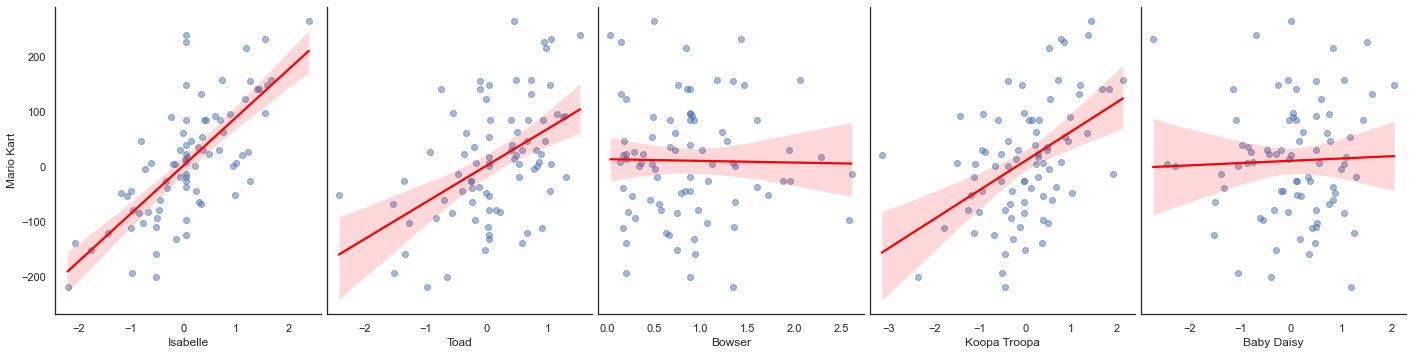

In [64]:
# scatter plots showing correlation
import pandas as pd
import seaborn as sns

# sns.pairplot(data=eda_data, x_vars=['Assignment1', 'Tutorial', 'Midterm', 'Final'], y_vars='FinalGrade', 
sns.pairplot(data=eda_data, x_vars=X_train.drop('const', axis=1).columns, y_vars='Mario Kart', 
             kind='reg',
             height=5,
             aspect=0.8, 
             plot_kws={'line_kws':{'color':'red'}, 'scatter_kws': {'alpha': 0.5}});

The shaded red areas represent our 95% confidence intervals. Remember our discussion of Confidence Intervals?

* Confidence intervals tend to be wider the more variability in a distribution
* Confidence intervals tend to be narrower the larger the sample size is
* Confidence intervals tend to be narrower when our accuracy is higher

Looking at the scatterplots, which of the features have linear characteristics? Which of the lines of best fit are closer to being parallel to the x axis?

## Prediction Intervals

You should use a prediction interval instead of a confidence intervals for predictions. Using the confidence interval will likely introduce error, meaning that values will fall outside that interval more often than you predict.

Stephanie Glen. "Prediction Interval: Simple Definition, Examples" From StatisticsHowTo.com: Elementary Statistics for the rest of us! https://www.statisticshowto.com/prediction-interval/

In [65]:
# build OLS model and print summary
import statsmodels.api as sm

# eda_data.insert(0, 'const', 1)
intervals_model = sm.OLS(eda_data['Mario Kart'], eda_data['Isabelle'])
results = intervals_model.fit()
print(results.summary())

                                 OLS Regression Results                                
Dep. Variable:             Mario Kart   R-squared (uncentered):                   0.525
Model:                            OLS   Adj. R-squared (uncentered):              0.519
Method:                 Least Squares   F-statistic:                              87.20
Date:                Thu, 06 Oct 2022   Prob (F-statistic):                    2.13e-14
Time:                        20:05:21   Log-Likelihood:                         -457.35
No. Observations:                  80   AIC:                                      916.7
Df Residuals:                      79   BIC:                                      919.1
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

In [66]:
# make predictions
predictions = results.get_prediction(eda_data['Isabelle']).summary_frame(alpha=0.05)
predictions[:1]

,mean,mean_se,mean_ci_lower,mean_ci_upper,obs_ci_lower,obs_ci_upper
55,3.438219,0.368196,2.705344,4.171095,-143.883523,150.759961


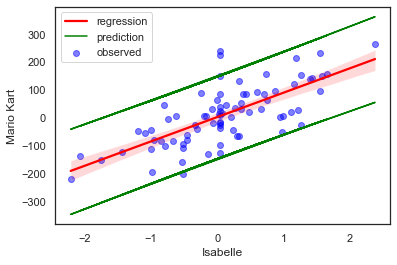

In [67]:
sns.regplot(x='Isabelle', y='Mario Kart', 
            data=eda_data, 
            scatter_kws={'color': 'blue', 'alpha': 0.5}, 
            label='observed',
            line_kws={'label': 'regression'},
            color='red')
plt.plot(eda_data['Isabelle'], predictions['obs_ci_upper'], label='prediction', color='green')
plt.plot(eda_data['Isabelle'], predictions['obs_ci_lower'], color='green')
plt.legend();

## Using Linear Regression for Imputation